<a href="https://colab.research.google.com/github/Ravneet7878/ML-Codes/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data Generation.

def generate_dataset(m):
    X = np.random.randn(m) * 10
    noise = np.random.randn(m) * 5
    y = 3 * X + 1 + noise

    return X, y

In [ ]:
# Data Visualization.

def plot_data(X, y, color = "orangered", title = "Linear Regression"):
    plt.style.use("seaborn-v0_8")
    plt.scatter(X, y, c = color)
    plt.title(title)
    plt.xlabel("X - axis")
    plt.ylabel("y - axis")
    plt.show()

In [ ]:
# Normalization Of Data.

def normalize_data(X):
    X = (X - X.mean()) / X.std()

    return X

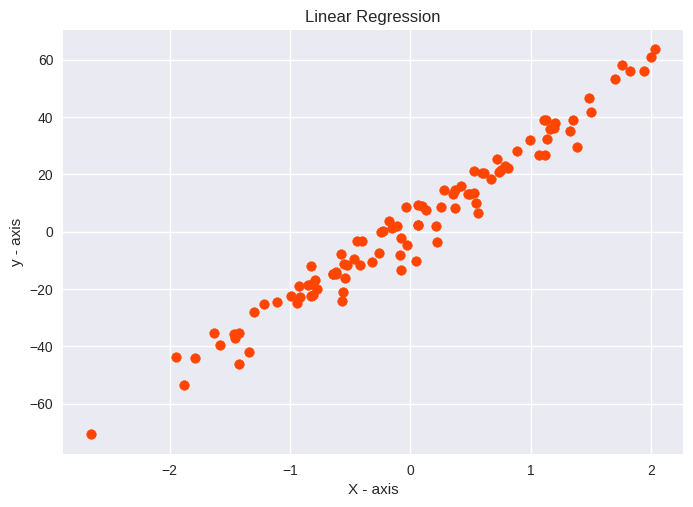

In [ ]:
X, y = generate_dataset(100)
X = normalize_data(X)
plot_data(X, y)

In [ ]:
# Training & Testing Data.

def train_test_split(X, y, split = 0.8):
    m = X.shape[0]
    data = np.zeros((m, 2))

    data[:, 0] = X
    data[:, 1] = y

    np.random.shuffle(data)

    split = int(m * split)

    X_train = data[: split, 0]
    y_train = data[: split, 1]

    X_test = data[split :, 0]
    y_test = data[split :, 1]

    return X_train, y_train, X_test, y_test

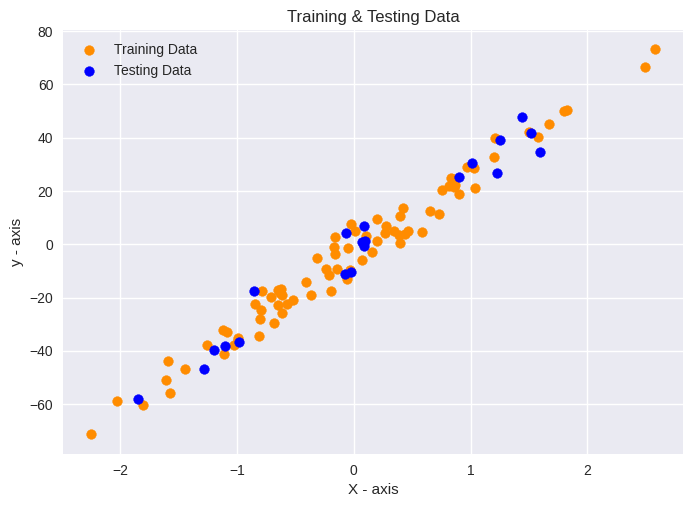

In [ ]:
# Plotting The Training & Testing Data.

X_train, y_train, X_test, y_test = train_test_split(X, y)

plt.title("Training & Testing Data")
plt.xlabel("X - axis")
plt.ylabel("y - axis")
plt.scatter(X_train, y_train, color = "darkorange", label = "Training Data")
plt.scatter(X_test, y_test, color = "blue", label = "Testing Data")
plt.legend()
plt.show()

In [ ]:
# Hypothesis Function.

def hypothesis(X, theta):
    return theta[1] * X + theta[0]

In [ ]:
# Error Function.

def error_function(X, y, theta):
    m = X.shape[0]
    error = 0

    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        error += (y_hat - y[i]) ** 2

    return error / (2 * m)

In [ ]:
# Gradient Function.

def gradient(X, y, theta):
    m = X.shape[0]
    grad = np.zeros((2, 1))

    for i in range(m):
        grad[0] += (hypothesis(X[i], theta) - y[i])
        grad[1] += ((hypothesis(X[i], theta) - y[i]) * X[i])

    return grad / m

In [ ]:
# Training The Model.

def train(X, y, learning_rate = 0.1):
    theta = np.zeros((2, 1))

    error_list = []

    for i in range(100):
        grad = gradient(X, y, theta)
        error = error_function(X, y, theta)
        error_list.append(error)
        theta[0] -= (learning_rate * grad[0])
        theta[1] -= (learning_rate * grad[1])

    plt.plot(error_list)
    plt.title("Error Function")
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Error")
    plt.show()

    return theta

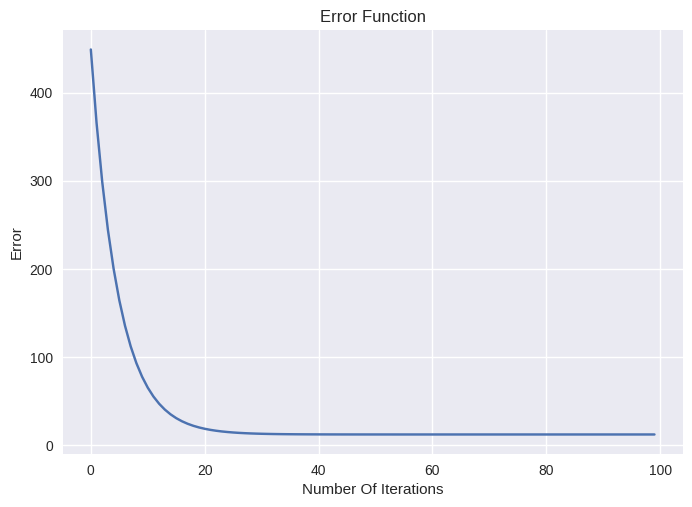

In [ ]:
theta = train(X, y)

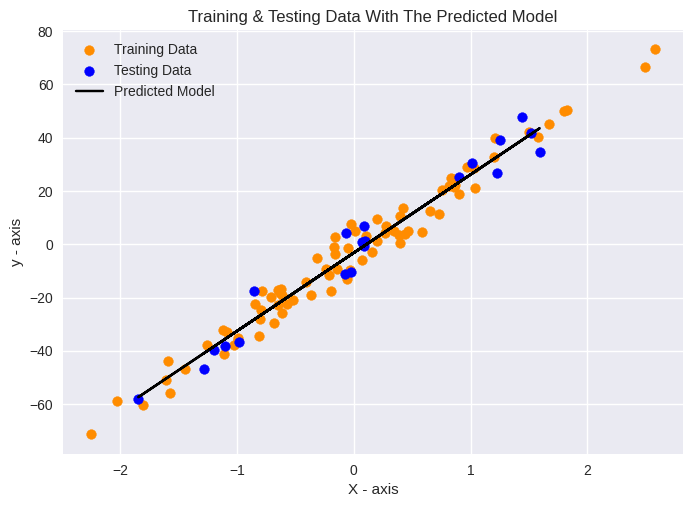

In [ ]:
# Predicting The Model.

y_predict = hypothesis(X_test, theta)

plt.title("Training & Testing Data With The Predicted Model")
plt.xlabel("X - axis")
plt.ylabel("y - axis")
plt.scatter(X_train, y_train, color = "darkorange", label = "Training Data")
plt.scatter(X_test, y_test, color = "blue", label = "Testing Data")
plt.plot(X_test, y_predict, color = "black", label = "Predicted Model")
plt.legend()
plt.show()

In [ ]:
# Model Evaluation Using R2 Score.

def R2_Score(y, y_predict):
    numerator = np.sum((y - y_predict) ** 2)
    denominator = np.sum((y - y.mean()) ** 2)

    return 1 - (numerator / denominator)

In [ ]:
# Visualising The Training Process With Different Values Of Theta_0 & Theta_1 With Corresponding Loss.

Theta_0 = np.arange(-400, 400, 10)
Theta_1 = np.arange(-400, 400, 10)

Theta_0, Theta_1 = np.meshgrid(Theta_0, Theta_1)
J = np.zeros(Theta_0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_predicted = (Theta_1[i, j] * X) + Theta_0[i, j]
        J[i, j] = np.mean((y - y_predicted) ** 2) / 2

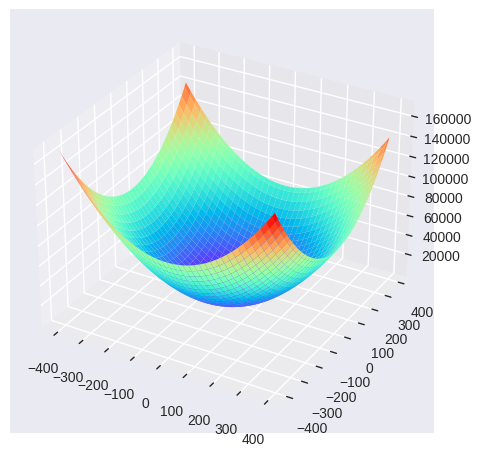

In [ ]:
# Plotting The 3D Surface.

fig = plt.figure()
axes = fig.add_subplot(111, projection = "3d")
axes.plot_surface(Theta_0, Theta_1, J, cmap = "rainbow")
plt.show()

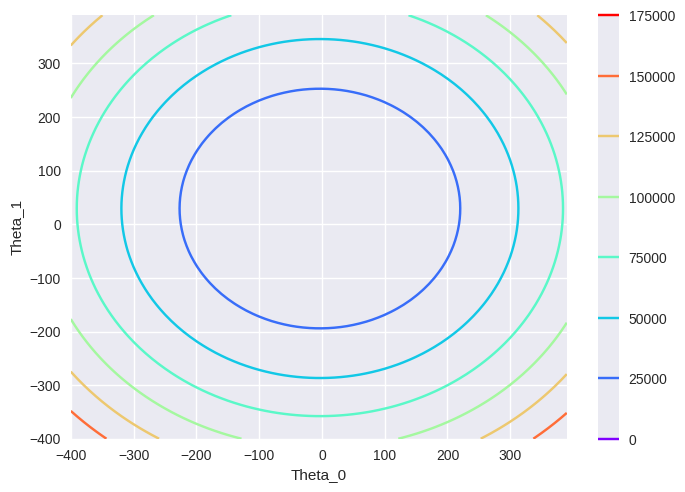

In [ ]:
# Plotting The Contour Plot.

fig, ax = plt.subplots()
contour = ax.contour(Theta_0, Theta_1, J, cmap = "rainbow")
ax.set_xlabel("Theta_0")
ax.set_ylabel("Theta_1")
axes.set_zlabel("Loss")
fig.colorbar(contour)
plt.show()

In [ ]:
# Trace The Trajectory Of Gradient.

def trajectory(X, y, learning_rate = 0.1):
    theta = np.array([-400, 400])

    error_list = []
    theta_list = []

    for i in range(100):
        grad = gradient(X, y, theta)
        error_list.append(error_function(X, y, theta))
        theta_list.append((theta[0], theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    return theta, theta_list, error_list


In [ ]:
theta, theta_list, error_list = trajectory(X_train, y_train)
theta_list = np.array(theta_list)

<ipython-input-18-3575a1c4b68e>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[0] = theta[0] - learning_rate * grad[0]
<ipython-input-18-3575a1c4b68e>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[1] = theta[1] - learning_rate * grad[1]


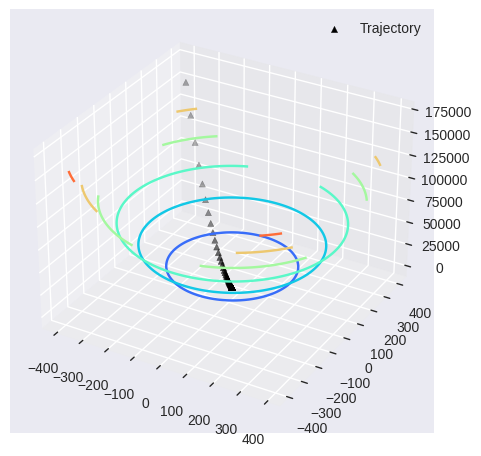

In [ ]:
# Plotting The 3D Surface With The Trajectory.

fig = plt.figure()
axes = fig.add_subplot(111, projection = "3d")
axes.contour(Theta_0, Theta_1, J, cmap = "rainbow")
axes.scatter(theta_list[:, 0], theta_list[:, 1], error_list, marker = '^', label = "Trajectory", color = "black")
plt.legend()
plt.show()

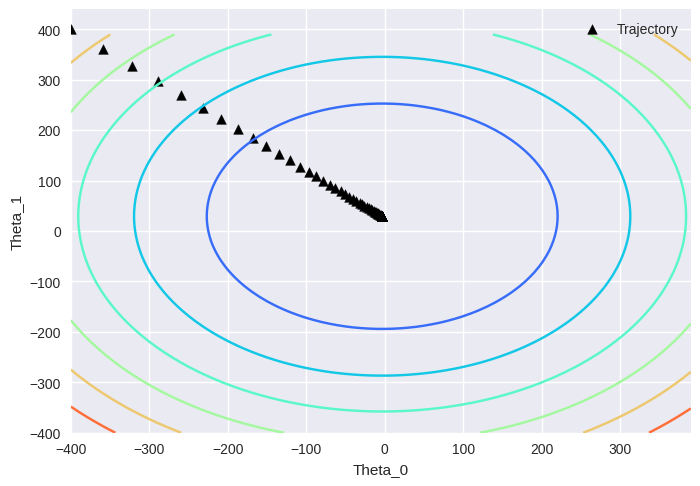

In [ ]:
# 2D Contour Plot (Top View).

plt.contour(Theta_0, Theta_1, J, cmap = "rainbow")
plt.xlabel("Theta_0")
plt.ylabel("Theta_1")
plt.scatter(theta_list[:, 0], theta_list[:, 1], marker = '^', label = "Trajectory", color = "black")
plt.legend()
plt.show()